Lo siguiente está basado en [R: Un lenguaje para análisis de datos por E. B. Zamudio](http://allman.rhon.itam.mx/~ebarrios/docs/porqueR.pdf), el prefacio y capítulo 1 de M.D. Ugarte, A. F. Militino, A. T. Arnholt, Probability and Statistics with R y [R-intro](https://cran.r-project.org/doc/manuals/R-intro.html)

# Información general

## Qué es?

R es un lenguaje de programación basado en *S* el cual es un lenguaje y un ambiente de programación interactiva para el análisis de datos y graficación desarrollado por los *Bell laboratories* por Rick Becker, John Chambers y Allan Wilks. Dos dialectos del lenguaje S existen: *R* una implementación **open source** disponible en [r-project](http://www.r-project.org) y *S-PLUS* una implementación comercial. R es el resultado de esfuerzos de todo el mundo y fue escrito inicialmente por Robert Gentleman y Ross Ihaka del departamento de Estadística de la Universidad de Auckland

R es un lenguaje y ambiente para cómputo estadístico y graficación. El término *ambiente* lo caracteriza como un sistema completamente planeado y coherente en el que técnicas estadísticas clásicas y modernas han sido implementadas. Algunas forman parte de *R* las llamadas *built-in* pero otras se proveen vía *packages*. Alrededor de *25* packages son incluídas con la instalación de R (*standard* & *recommended*) y muchas más se encuentran disponibles en [CRAN family of Internet sites: Contributed Packages](https://cran.r-project.org/web/packages/index.html)

## Qué provee?

El ambiente de R contiene software que permite la manipulación de datos, cálculos y visualización de gráficos y tiene:

* programas para almacenamiento y manejo de datos.
* una gamma amplia de operadores para cálculos en arreglos, en particular matrices.
* una gran colección de herramientas intermedias correctamente integradas para análisis de datos.
* lenguaje de programación *S* para *loops*, funciones definidas por users y desarrollo para I/O.


*R* es un vehículo para desarrollo de nuevos métodos de análisis de datos de forma interactiva y se extiende por medio de paquetes.

## Diferencia entre S y R?

(extraído de [R-intro: 1.3 R and statistics](https://cran.r-project.org/doc/manuals/R-intro.html)) "There is an important difference in philosophy between S (and hence R) and the other main statistical systems. In S a statistical analysis is normally done as a series of steps, with intermediate results being stored in objects. Thus whereas SAS and SPSS will give copious output from a regression or discriminant analysis, R will give minimal output and store the results in a fit object for subsequent interrogation by further R functions."

## Características de S 

(extraído de [R: Un lenguaje para análisis de datos por E. B. Zamudio](http://allman.rhon.itam.mx/~ebarrios/docs/porqueR.pdf))

* *S* es sobre datos: provee de herramientas generales y fáciles de usar para la organización, almacenamiento y recuperación de varios tipos de datos.

* *S* es sobre análisis: es decir, cálculos necesarios para entender los datos. *S* provee de métodos numéricos y otras técnicas computacionales.

* *S* es sobre programación: usted puede programar funciones en el mismo lenguaje *S* aprovechando su poder y simplicidad. Si es necesario el lenguaje ofrece  interfaces  sencillas  para  comunicación  con  el  sistema  operativo  o rutinas en C y Fortran.

* Especialmente, *S* es sobre graficación: ver a los datos de maneras interactivas, informativas y flexibles. Las capacidades de *S* están diseñadas para motivar la creación de nuevas herramientas e intentar nuevas ideas.


## Ejemplo:

Calcular la probabilidad de obtener sol en $1000$ lanzamientos de una moneda

**Solución:** para este caso usamos a la función *sample* que se encuentra en el paquete base de R. Su descripción se puede obtener con:

In [1]:
?sample # o bien help(sample)

sample {base},R Documentation
x,"either a vector of one or more elements from which to choose, or a positive integer. See ‘Details.’"
n,"a positive number, the number of items to choose from. See ‘Details.’"
size,a non-negative integer giving the number of items to choose.
replace,should sampling be with replacement?
prob,a vector of probability weights for obtaining the elements of the vector being sampled.
useHash,"logical indicating if the hash-version of the algorithm should be used. Can only be used for replace = FALSE, prob = NULL, and size <= n/2, and really should be used for large n, as useHash=FALSE will use memory proportional to n."


Si queremos ejecutar los ejemplos de la ayuda se utiliza

In [2]:
example(sample)


sample> x <- 1:12

sample> # a random permutation
sample> sample(x)
 [1]  8  2 12  1  5 11 10  7  4  3  9  6

sample> # bootstrap resampling -- only if length(x) > 1 !
sample> sample(x, replace = TRUE)
 [1]  5  6  6 12 11  1  6  8  8  7  9  4

sample> # 100 Bernoulli trials
sample> sample(c(0,1), 100, replace = TRUE)
  [1] 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1
 [38] 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0
 [75] 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1

sample> ## More careful bootstrapping --  Consider this when using sample()
sample> ## programmatically (i.e., in your function or simulation)!
sample> 
sample> # sample()'s surprise -- example
sample> x <- 1:10

sample>     sample(x[x >  8]) # length 2
[1]  9 10

sample>     sample(x[x >  9]) # oops -- length 10!
 [1]  5  2  7  6  8  9  3 10  4  1

sample>     sample(x[x > 10]) # length 0
integer(0)

sample> ## safer version:
sample> resample <- function(x

Por ejemplo si queremos simular un resultado de lanzamiento lo ejecutamos como:

In [3]:
sample(c('aguila', 'sol'),1)

[1] "sol"

Si queremos simular tres resultados de lanzamientos realizamos:

In [4]:
sample(c('aguila', 'sol'),3, replace=T)

[1] "sol"    "aguila" "sol"

Creamos una función con la palabra *function* que recibe el número de lanzamientos a realizar:

In [5]:
lanza_moneda <- function(numero_de_lanzamientos)sample(c('aguila', 'sol'),
                                                       numero_de_lanzamientos,
                                                       replace=T)

In [6]:
lanza_moneda(4)

[1] "aguila" "sol"    "sol"    "aguila"

In [7]:
num_lanzamientos = 1000
sum(lanza_moneda(num_lanzamientos)=='sol')/num_lanzamientos

[1] 0.486

### Y si quisiéramos usar un paquete para este ejemplo...

Existe el paquete `prob` que es un framework para calcular probabilidades de experimentos sencillos (finitos) y generar las posibilidades de resultados. Se utiliza `install.packages('package')` para realizar la instalación. ver: [Package prob](https://cran.r-project.org/web/packages/prob/prob.pdf)

In [8]:
#install.packages('prob', repos='http://cran.itam.mx/')

In [9]:
library(prob)

Loading required package: combinat

Attaching package: 'combinat'

The following object is masked from 'package:utils':

    combn

Loading required package: fAsianOptions
Loading required package: timeDate
Loading required package: timeSeries
Loading required package: fBasics
Loading required package: fOptions

Attaching package: 'prob'

The following objects are masked from 'package:base':

    intersect, setdiff, union



In [10]:
tosscoin(1) #1 lanzamiento de una moneda, dos posibilidades

toss1
<fct>
H
T


In [11]:
tosscoin(1, makespace = T) #1 lanzamiento de una moneda, dos posibilidades y probabilidad de .5

toss1,probs
<fct>,<dbl>
H,0.5
T,0.5


In [12]:
tosscoin(3, makespace = T) #lanzamiento de tres monedas, 8 posibilidades y probabilidad de 1/8

toss1,toss2,toss3,probs
<fct>,<fct>,<fct>,<dbl>
H,H,H,0.125
T,H,H,0.125
H,T,H,0.125
T,T,H,0.125
H,H,T,0.125
T,H,T,0.125
H,T,T,0.125
T,T,T,0.125


In [13]:
demo()

Package,Item,Title
<chr>,<chr>,<chr>
stats,glm.vr,Some glm() examples from V&R with several predictors
stats,lm.glm,Some linear and generalized linear modelling examples from `An Introduction to Statistical Modelling' by Annette Dobson
stats,nlm,Nonlinear least-squares using nlm()
stats,smooth,`Visualize' steps in Tukey's smoothers
graphics,Hershey,Tables of the characters in the Hershey vector fonts
graphics,Japanese,Tables of the Japanese characters in the Hershey vector fonts
graphics,graphics,A show of some of R's graphics capabilities
graphics,image,The image-like graphics builtins of R
graphics,persp,Extended persp() examples




	demo(graphics)
	---- ~~~~~~~~

> #  Copyright (C) 1997-2009 The R Core Team
> 
> require(datasets)

> require(grDevices); require(graphics)

> ## Here is some code which illustrates some of the differences between
> ## R and S graphics capabilities.  Note that colors are generally specified
> ## by a character string name (taken from the X11 rgb.txt file) and that line
> ## textures are given similarly.  The parameter "bg" sets the background
> ## parameter for the plot and there is also an "fg" parameter which sets
> ## the foreground color.
> 
> 
> x <- stats::rnorm(50)

> opar <- par(bg = "white")

> plot(x, ann = FALSE, type = "n")

> abline(h = 0, col = gray(.90))

> lines(x, col = "green4", lty = "dotted")

> points(x, bg = "limegreen", pch = 21)

> title(main = "Simple Use of Color In a Plot",
+       xlab = "Just a Whisper of a Label",
+       col.main = "blue", col.lab = gray(.8),
+       cex.main = 1.2, cex.lab = 1.0, font.main = 4, font.lab = 3)

> ## A little color wheel

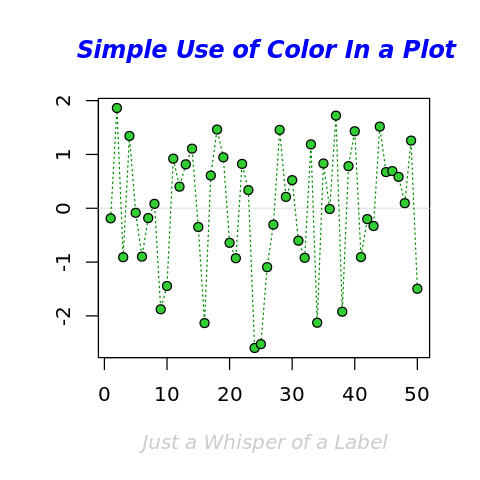


> title(main = "A Sample Color Wheel", cex.main = 1.4, font.main = 3)

> title(xlab = "(Use this as a test of monitor linearity)",
+       cex.lab = 0.8, font.lab = 3)

> ## We have already confessed to having these.  This is just showing off X11
> ## color names (and the example (from the postscript manual) is pretty "cute".
> 
> pie.sales <- c(0.12, 0.3, 0.26, 0.16, 0.04, 0.12)

> names(pie.sales) <- c("Blueberry", "Cherry",
+ 		      "Apple", "Boston Cream", "Other", "Vanilla Cream")

> pie(pie.sales,
+     col = c("purple","violetred1","green3","cornsilk","cyan","white"))


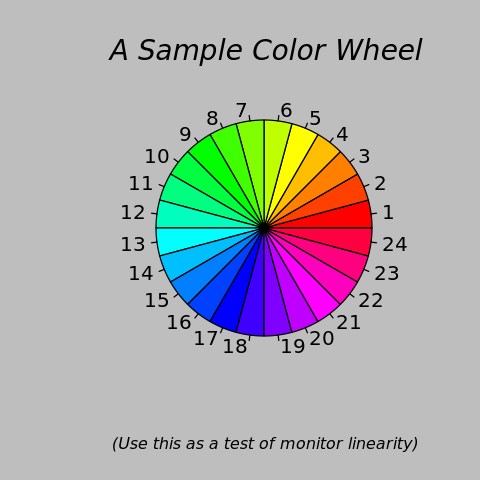


> title(main = "January Pie Sales", cex.main = 1.8, font.main = 1)

> title(xlab = "(Don't try this at home kids)", cex.lab = 0.8, font.lab = 3)

> ## Boxplots:  I couldn't resist the capability for filling the "box".
> ## The use of color seems like a useful addition, it focuses attention
> ## on the central bulk of the data.
> 
> par(bg="cornsilk")

> n <- 10

> g <- gl(n, 100, n*100)

> x <- rnorm(n*100) + sqrt(as.numeric(g))

> boxplot(split(x,g), col="lavender", notch=TRUE)


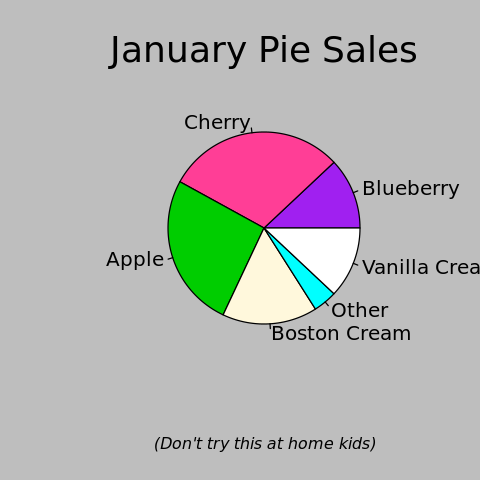


> title(main="Notched Boxplots", xlab="Group", font.main=4, font.lab=1)

> ## An example showing how to fill between curves.
> 
> par(bg="white")

> n <- 100

> x <- c(0,cumsum(rnorm(n)))

> y <- c(0,cumsum(rnorm(n)))

> xx <- c(0:n, n:0)

> yy <- c(x, rev(y))

> plot(xx, yy, type="n", xlab="Time", ylab="Distance")


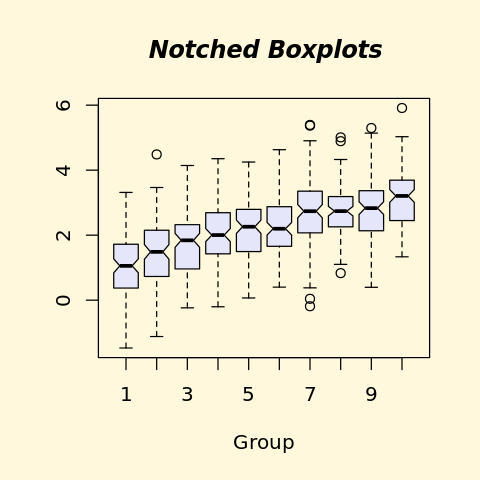


> polygon(xx, yy, col="gray")

> title("Distance Between Brownian Motions")

> ## Colored plot margins, axis labels and titles.	 You do need to be
> ## careful with these kinds of effects.	It's easy to go completely
> ## over the top and you can end up with your lunch all over the keyboard.
> ## On the other hand, my market research clients love it.
> 
> x <- c(0.00, 0.40, 0.86, 0.85, 0.69, 0.48, 0.54, 1.09, 1.11, 1.73, 2.05, 2.02)

> par(bg="lightgray")

> plot(x, type="n", axes=FALSE, ann=FALSE)


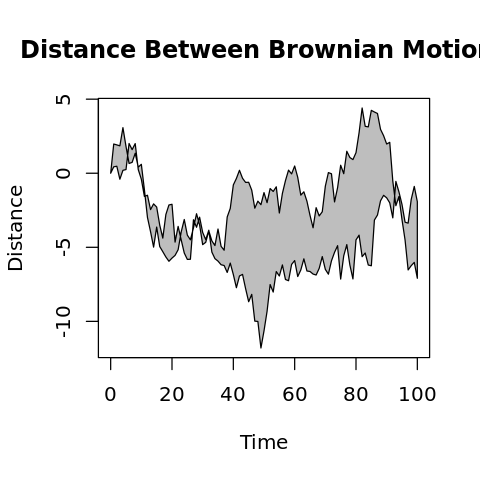


> usr <- par("usr")

> rect(usr[1], usr[3], usr[2], usr[4], col="cornsilk", border="black")

> lines(x, col="blue")

> points(x, pch=21, bg="lightcyan", cex=1.25)

> axis(2, col.axis="blue", las=1)

> axis(1, at=1:12, lab=month.abb, col.axis="blue")

> box()

> title(main= "The Level of Interest in R", font.main=4, col.main="red")

> title(xlab= "1996", col.lab="red")

> ## A filled histogram, showing how to change the font used for the
> ## main title without changing the other annotation.
> 
> par(bg="cornsilk")

> x <- rnorm(1000)

> hist(x, xlim=range(-4, 4, x), col="lavender", main="")


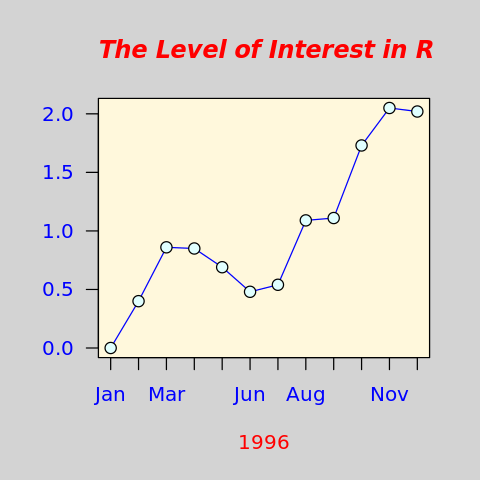


> title(main="1000 Normal Random Variates", font.main=3)

> ## A scatterplot matrix
> ## The good old Iris data (yet again)
> 
> pairs(iris[1:4], main="Edgar Anderson's Iris Data", font.main=4, pch=19)


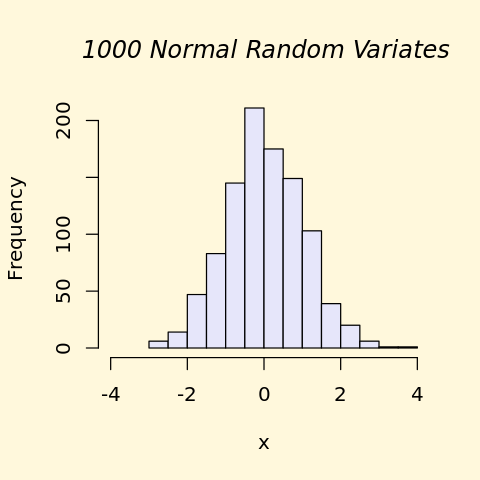


> pairs(iris[1:4], main="Edgar Anderson's Iris Data", pch=21,
+       bg = c("red", "green3", "blue")[unclass(iris$Species)])


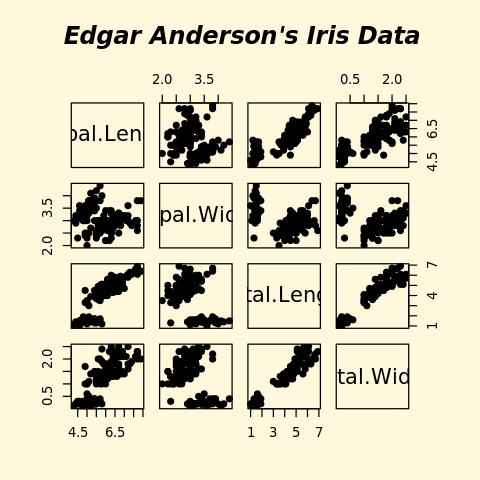


> ## Contour plotting
> ## This produces a topographic map of one of Auckland's many volcanic "peaks".
> 
> x <- 10*1:nrow(volcano)

> y <- 10*1:ncol(volcano)

> lev <- pretty(range(volcano), 10)

> par(bg = "lightcyan")

> pin <- par("pin")

> xdelta <- diff(range(x))

> ydelta <- diff(range(y))

> xscale <- pin[1]/xdelta

> yscale <- pin[2]/ydelta

> scale <- min(xscale, yscale)

> xadd <- 0.5*(pin[1]/scale - xdelta)

> yadd <- 0.5*(pin[2]/scale - ydelta)

> plot(numeric(0), numeric(0),
+      xlim = range(x)+c(-1,1)*xadd, ylim = range(y)+c(-1,1)*yadd,
+      type = "n", ann = FALSE)


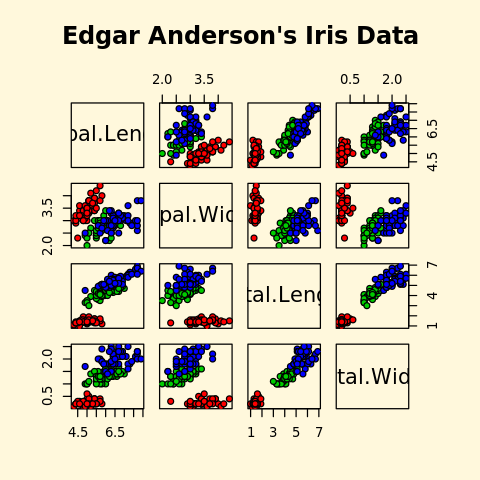


> usr <- par("usr")

> rect(usr[1], usr[3], usr[2], usr[4], col="green3")

> contour(x, y, volcano, levels = lev, col="yellow", lty="solid", add=TRUE)

> box()

> title("A Topographic Map of Maunga Whau", font= 4)

> title(xlab = "Meters North", ylab = "Meters West", font= 3)

> mtext("10 Meter Contour Spacing", side=3, line=0.35, outer=FALSE,
+       at = mean(par("usr")[1:2]), cex=0.7, font=3)

> ## Conditioning plots
> 
> par(bg="cornsilk")

> coplot(lat ~ long | depth, data = quakes, pch = 21, bg = "green3")


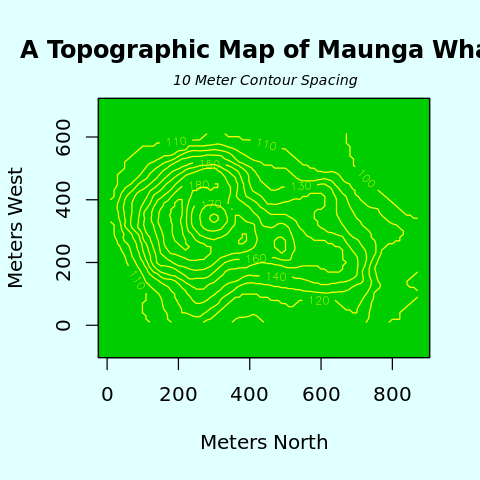


> par(opar)


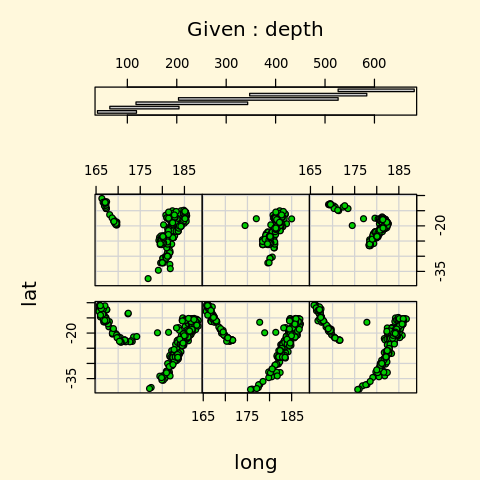

In [14]:
options(repr.plot.width=4, repr.plot.height=4) # esta línea sólo para jupyterlab no para Rstudio
demo(graphics)

In [15]:
?base

base-package {base},R Documentation


In [16]:
sessionInfo()

R version 3.6.0 (2019-04-26)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.2 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.7.1
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.7.1

locale:
[1] C

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] prob_1.0-1            fAsianOptions_3042.82 fOptions_3042.86     
[4] fBasics_3042.89       timeSeries_3042.102   timeDate_3043.102    
[7] combinat_0.0-8       

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.1          uuid_0.1-2          rlang_0.3.4        
 [4] tools_3.6.0         htmltools_0.3.6     digest_0.6.19      
 [7] crayon_1.3.4        IRdisplay_0.7.0     repr_1.0.1         
[10] base64enc_0.1-3     vctrs_0.1.0         IRkernel_1.0.1.9000
[13] zeallot_0.1.0       evaluate_0.14       pbdZMQ_0.3-3       
[16] compiler_3.6.0      pillar_1.4.1        backports_1.1.4    
[19] spatial_7.3